# 预估波士顿房价

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

In [2]:
housing_data = datasets.load_boston()  # 房价数据集
X = housing_data.data  # 输入数据
y = housing_data.target  # 房价
X, y = shuffle(X, y, random_state=7)  # random_state用来控制如何打乱
X, y

/Users/whoami/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

(array([[3.8497e+00, 0.0000e+00, 1.8100e+01, ..., 2.0200e+01, 3.9134e+02,
         1.3270e+01],
        [3.0410e-02, 0.0000e+00, 5.1900e+00, ..., 2.0200e+01, 3.9481e+02,
         1.0560e+01],
        [2.4103e-01, 0.0000e+00, 7.3800e+00, ..., 1.9600e+01, 3.9690e+02,
         1.2790e+01],
        ...,
        [8.4054e-01, 0.0000e+00, 8.1400e+00, ..., 2.1000e+01, 3.0342e+02,
         1.6510e+01],
        [4.0110e-02, 8.0000e+01, 1.5200e+00, ..., 1.2600e+01, 3.9690e+02,
         4.0800e+00],
        [6.6640e-02, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9096e+02,
         5.3300e+00]]),
 array([21.7, 18.5, 22.2, 20.4,  8.8,  8.3, 21.4, 23.6, 23.5, 19. , 10.2,
        31.6, 18.4, 19.4, 44. , 23.2, 22. , 33.1, 13.2, 21.7, 16.7, 23.9,
        42.3, 18.5, 14.6,  7.5, 33.4, 22. , 28.1, 24.8, 19.9, 24.8, 28.7,
        14.1, 43.5, 20.4, 18.3, 13.4, 21. , 22. , 22.6, 13.9, 13.3, 26.5,
        20. ,  9.5, 21.6, 22.6, 15.6, 23.1, 27.1, 25.2, 15. , 21.9,  9.6,
        22.7, 18.3, 21.4, 20.5, 21.1, 2

In [3]:
# 划分训练和测试集
num_training = int(0.8 * len(X))
X_train, y_train = X[: num_training], y[: num_training]
X_test, y_test = X[num_training: ], y[num_training: ]

决策树回归模型

In [18]:
depth = 1024
dt_regressor = DecisionTreeRegressor(max_depth=depth)
dt_regressor.fit(X_train, y_train)

# AdaBoost算法
ab_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=depth),
    n_estimators=400,
    random_state=7
)
ab_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1024),
                  n_estimators=400, random_state=7)

查看训练效果
误差越小越好，方差越接近1越好

In [19]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)

print("mean_squared_error {}\nexplained_variance_score {}".format(mse, evs))

mean_squared_error 16.82735294117647
explained_variance_score 0.7978937340123518


In [20]:
y_pred_ab = ab_reg.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred_ab)
evs2 = explained_variance_score(y_test, y_pred_ab)
print("mean_squared_error {}\nexplained_variance_score {}".format(mse2, evs2))

mean_squared_error 7.256176470588235
explained_variance_score 0.9118180933815324


## 特征的相对重要性

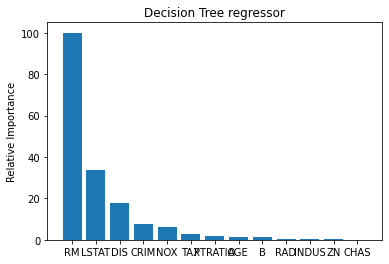

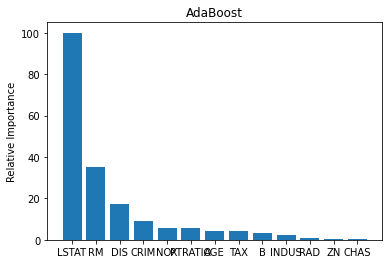

In [34]:
def plot_feature_importances(feature_importance, title, feature_names):
    """
    画出特征重要性的图片
    :param feature_importance: list
    :param title: str
    :param feature_names: list
    :return:
    """
    feature_importance = 100.0 * (feature_importance / max(feature_importance))  # 标准化重要性指标
    index_sorted = np.flipud(np.argsort(feature_importance))  # 得分从高到底排序
    pos = np.arange(index_sorted.shape[0]) + 0.5  # 居中显示标签

    # plot
    plt.figure()
    plt.bar(pos, height=feature_importance[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

plot_feature_importances(dt_regressor.feature_importances_,
                         'Decision Tree regressor',
                         housing_data.feature_names),
plot_feature_importances(ab_reg.feature_importances_,
                         'AdaBoost',
                         housing_data.feature_names)
